In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Fish.csv to Fish.csv


In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport
%matplotlib inline

In [93]:
data=pd.read_csv('Fish.csv')
data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
data.shape

(159, 7)

In [ ]:
data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


##### ***Data dictionary***. 
##### We have 7 columns
##### Species: species name of fish, which is categorical datatype.
##### Weight: weight of fish in gm.
##### Length1 : vertical length in cm.
##### Length2 :diagonal length in cm.
##### Length3 :cross length in cm.
##### Height: height in cm.
##### Width :diagonal width in cm.

In [ ]:
data.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


### we can observe that in the ***Weight*** column some samples have ***zero*** value, this does't make any sens. this's obviously a data entry ***error*** and we have to deal with. 
### we can observe that there are strong relationships between ***Length1***, ***Length2*** and ***Length3***. as they have Very close numbers in the ***IQRs***, the ***min***, the ***mean*** and the ***max***.

In [ ]:
# we're goning to replace zero with Nan in the weight column.
data["Weight"].replace(0, np.nan, inplace=True)
data.isna().sum()

Species    0
Weight     1
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

##### Just one sample has zero weight value.
### Let's find out more about our data.

In [ ]:
data.describe(include=["O"])

,Species
count,159
unique,7
top,Perch
freq,56


In [ ]:
pd.DataFrame(data["Species"].value_counts()).T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


### The ***perch*** fish type is the most numerous.
### The ***whitefish*** fish type is the least numerous.
### But for better eye view, let's visualize it.

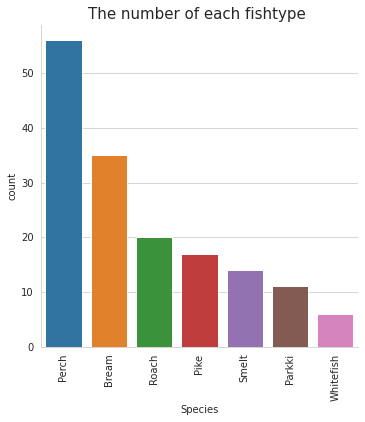

In [ ]:
order=["Perch", "Bream", "Roach", "Pike", "Smelt", "Parkki", "Whitefish"]
sns.set_style("whitegrid")
sns.catplot(data=data, x="Species", kind="count", order=order)
plt.title("The number of each fishtype ", fontsize=15)
plt.xticks(rotation=90)
plt.show()

In [ ]:
def boxplot(var):
    # this function take the variable and return a boxplot for each type of fish
    sns.boxplot(x="Species", y=var, data=data,palette='rainbow')

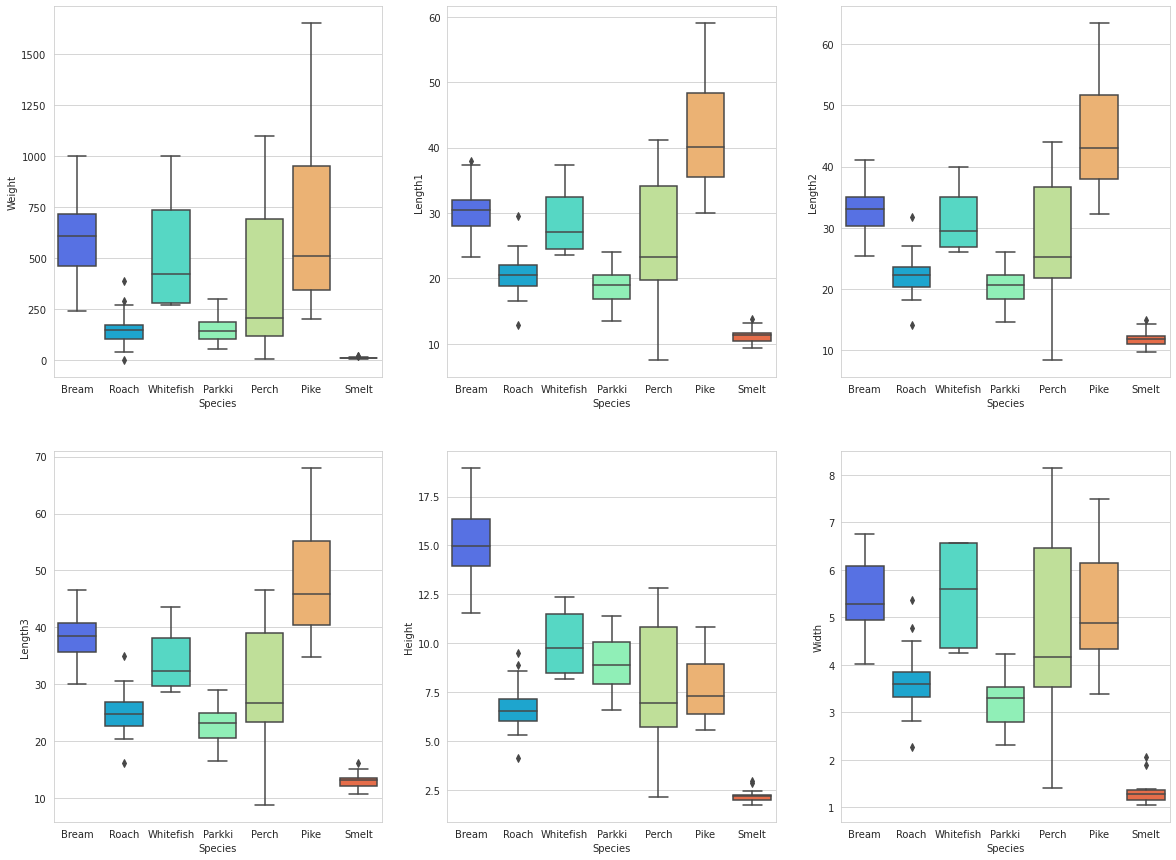

In [ ]:
col=["Weight","Length1","Length2","Length3","Height","Width"]
fig, ax = plt.subplots(2, 3,figsize=(20,15))
a=1
for i in col:
  plt.subplot(2,3,a)
  boxplot(data[i])
  a=a+1

### One of the reasons of ***prech*** is the ***best-selling*** fishtype is that it is  in ***different sizes***. weight and lengths are spread in ***wide rangs*** that make it easy to pick out.
### In contrast, ***Whitefish*** is the least. as it is in narrow ranges in weight and lengths.


### Reporting data to know more details about it

In [ ]:
ProfileReport(data)

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

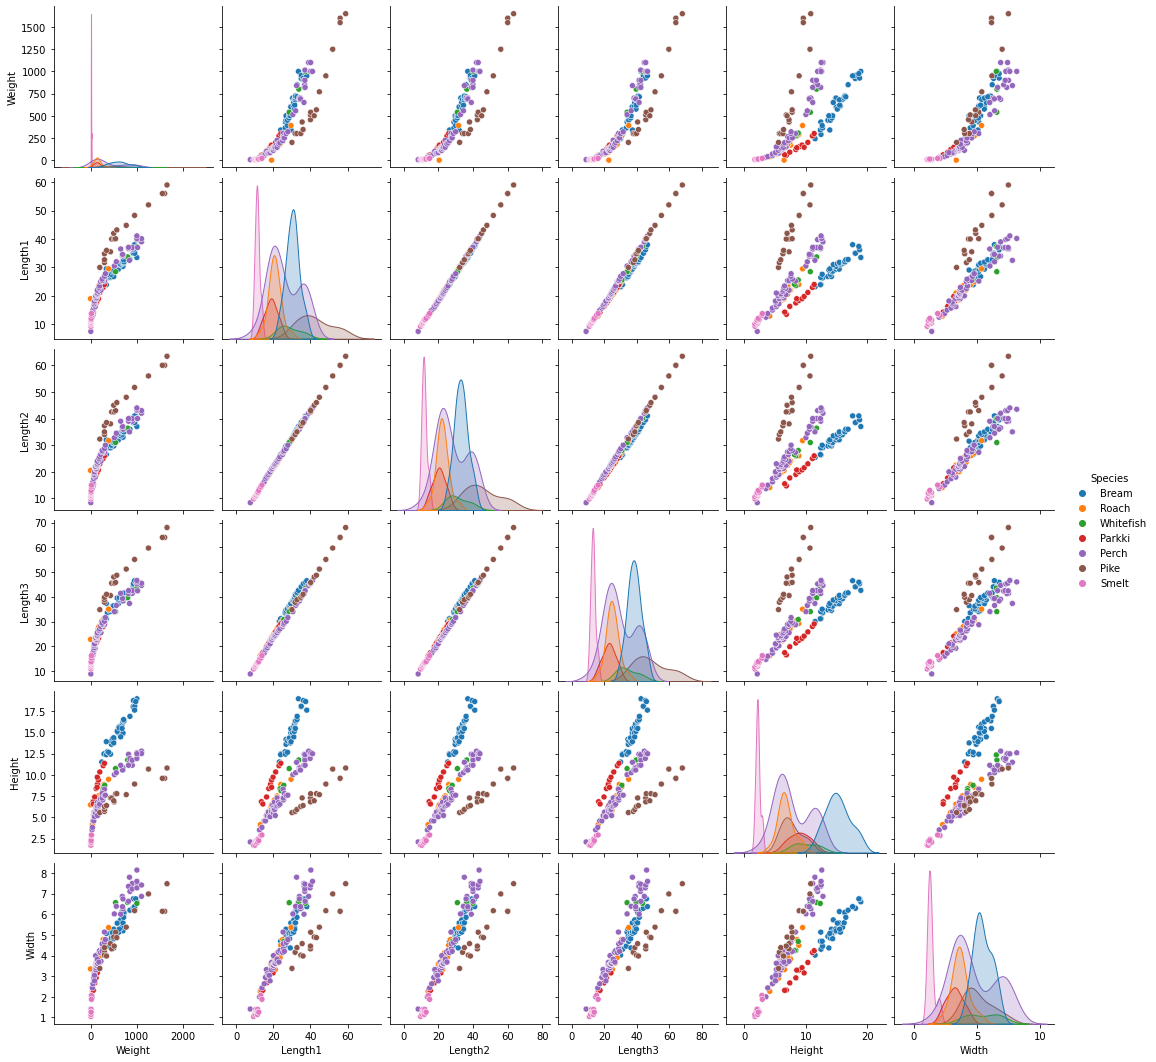

In [ ]:
sns.pairplot(data=data, hue="Species")

### Length1, Length2, Length3, Height and Width are On a ***positive relationship*** with weight, as the more increasing in them all leads to increase weight.
### and again there are very strong correlation between ***Length1, Length2 and Length3***

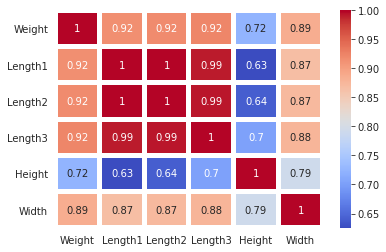

In [ ]:
sns.heatmap(data.corr(),cmap='coolwarm',annot=True,linecolor='white',linewidths=4)

### After exploring the data in the profile report in the cell above, the heatmap. We found out that there is a ***strong correlation*** between featurres, especially the longest.
### Length1 is highly correlated with Weight (ρ = 0.91571)
### Length2 is highly correlated with Length1 (ρ = 0.99952)
### Length3 is highly correlated with Length2 (ρ = 0.9941)
### So, Simply we are going to ***drop*** them


In [ ]:
data.drop(['Length2','Length3'],axis=1,inplace=True)
data.head()

,Species,Weight,Length1,Height,Width
0,Bream,242.0,23.2,11.5200,4.0200
1,Bream,290.0,24.0,12.4800,4.3056
2,Bream,340.0,23.9,12.3778,4.6961
3,Bream,363.0,26.3,12.7300,4.4555
4,Bream,430.0,26.5,12.4440,5.1340


#### We have got ***zero*** value in weight column equal to ***Nan***, Now simply we are going to drop it.

In [ ]:
data.dropna(inplace=True)

## Data preprocessing 

### Now let's divide our dataset into ***two parts*** the first part is that we want to ***estimate*** which is ***weight column***, and the other part is the least of ***features*** we will use.
 

In [ ]:
X = data.drop('Weight',axis=1)
y=data['Weight']

### linear regression requires numerical variables and the ***Species*** column is a ***categorical variable***. So, we'll use a technique called ***one-hot encoding*** to convert the ***categorical*** variables to ***numerical***. This technique transforms each category value into a new column and assigns a 1 or 0 to the column.

In [ ]:
species = pd.get_dummies(data["Species"],drop_first=True)
species.head()

,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0


In [ ]:
X.drop(["Species"],axis=1, inplace=True)
X.head()

,Length1,Height,Width
0,23.2,11.5200,4.0200
1,24.0,12.4800,4.3056
2,23.9,12.3778,4.6961
3,26.3,12.7300,4.4555
4,26.5,12.4440,5.1340


### Due to the wide ranges for features the gradient descent takes alot of steps and many iterations to get to the local minimum. ***Feature Scaling*** is a way to make gradient descent work much faster by getting the features in small ranges. the techniqe we are going to use called ***mean normalization***.
#### The core idea is to replace feature(Xi) with [Xi - μ / range ], where Xi is the Feature value, μ is the arithmetic mean of all Feature values in training example, range is  max - min. 

In [ ]:
# note we are getting our features in range from 0 - to - 1
scaler = MinMaxScaler(copy=True, feature_range=(0, 1))
X = pd.DataFrame(scaler.fit_transform(X))
X.head()

,0,1,2
0,0.304854,0.568334,0.418978
1,0.320388,0.624055,0.459235
2,0.318447,0.618123,0.514279
3,0.365049,0.638566,0.480365
4,0.368932,0.621966,0.576004


In [ ]:
X = pd.concat([X,species],axis = 1)
X.head()

,0,1,2,Parkki,Perch,Pike,Roach,Smelt,Whitefish
0,0.304854,0.568334,0.418978,0,0,0,0,0,0
1,0.320388,0.624055,0.459235,0,0,0,0,0,0
2,0.318447,0.618123,0.514279,0,0,0,0,0,0
3,0.365049,0.638566,0.480365,0,0,0,0,0,0
4,0.368932,0.621966,0.576004,0,0,0,0,0,0


#### Now let's split our dataset into training and testing.

In [ ]:
from sklearn.model_selection import train_test_split
X_train ,X_test , y_train , y_test =train_test_split(X,y, test_size = 0.2 , random_state=4)

In [ ]:
from sklearn.linear_model import LinearRegression
lm=LinearRegression()
lm.fit(X_train,y_train)

predictions = lm.predict( X_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error

MAE: 60.75130780006659


In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
r2_score(y_test, predictions)

MAE: 60.75130780006659


0.9395630683870619

#### 93% is the accuracy of our linear Regression model, we are going to tray anther model called RandomForestRegressor  

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train,y_train)

prediction = model.predict(X_test)

In [ ]:
r2_score(y_test,prediction)

0.9576547420554415